In [1]:
import theano
import theano.tensor as T

import numpy as np
import matplotlib.pyplot as plt

In [2]:
class RNN():
    def __init__(self, n_in, n_hidden, output_activation_func=T.nnet.softmax):
        self.U = theano.shared(value=np.random.normal(loc=0.0, 
                                                      scale=0.01, 
                                                      size=(n_hidden, n_in)).astype(theano.config.floatX))
        self.V = theano.shared(value=np.random.normal(loc=0.0, 
                                                      scale=0.01, 
                                                      size=(n_in, n_hidden)).astype(theano.config.floatX))
        self.W = theano.shared(value=np.random.normal(loc=0.0, 
                                                      scale=0.01, 
                                                      size=(n_hidden, n_hidden)).astype(theano.config.floatX))
        
        self.b = theano.shared(value=np.zeros((n_hidden, )).astype(theano.config.floatX))
        self.c = theano.shared(value=np.zeros((n_in, )).astype(theano.config.floatX))
        
        self.activation_func = output_activation_func
        self.params = [self.U, self.V, self.W, self.b, self.c]
        
        x = T.matrix('x')
        y = T.scalar('y')
        eta = 0.01
        
        h, _ = theano.scan(self.step_forward, 
                           sequences = x,
                           outputs_info = [np.zeros(n_hidden).astype(theano.config.floatX)],
                           non_sequences = [self.U, self.W, self.b])
        
        o = self.c + T.dot(self.V, h[-1])
        cost = ((o - y)**2).mean(axis=0).sum()
        
        self.training_step = theano.function([x, y], 
                                            cost,
                                            updates=self.gradient_update(cost, self.params, eta))
        
        
    def step_forward(self, x_t, h_t_prev, U, W, b):
        h_t = T.tanh(b + T.dot(W, h_t_prev) + T.dot(U, x_t))
        return(h_t)
    
    
    def gradient_update(self, loss, params, eta):
        updated_param = []
        for param in params:
            step = -eta*T.grad(loss, param)
            updated_param.append((param, param + step))
        return(updated_param)

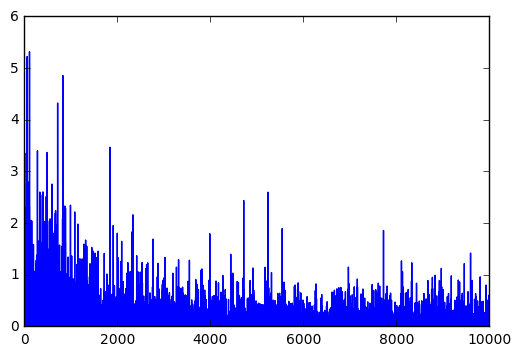

In [4]:
recursive_net = RNN(2, 20)
cost_list = []
for i in range(10000):
    x = np.random.rand(10,2)
    y = np.dot(x[:,0], x[:,1])
    cost = recursive_net.training_step(x, y)
    cost_list.append(cost)
plt.plot(cost_list)
plt.show()